# plot_decision_regions

In [65]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # Configuring marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plotting decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotting data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl,
                    edgecolor='black')

## 1. Split the dataset into training and testing subsets.
Rozdziel zestaw danych na podzbiory uczący i testowy,

In [66]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()

#Select the features
X = iris.data[:, [1, 2]]
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 2. Check the performance of a decision tree using entropy and Gini impurity metrics - compare the results and provide reasoning for the outcomes.
Below is an example of creating a decision tree. The documentation for the class that can be used for constructing a decision tree can be found in the link below.

Sprawdź działanie drzewa dla entropii i współczynnika Giniego - porównaj wyniki i uargumentuj rezultaty.
Przykład tworzenia drzewa decyzyjnego znajduje się poniżej.
Dokumentacja klasy, którą można wykorzystać do konstrukcji drzewa decyzyjnego, znajduję się w linku poniżej.

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

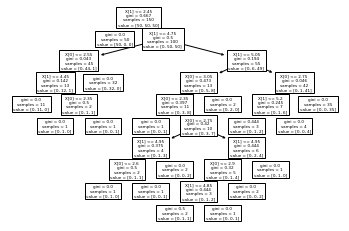

In [67]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()  # Uzupełnić parametry konstruktora
clf = clf.fit(X, y)
tree.plot_tree(clf)
plt.show()

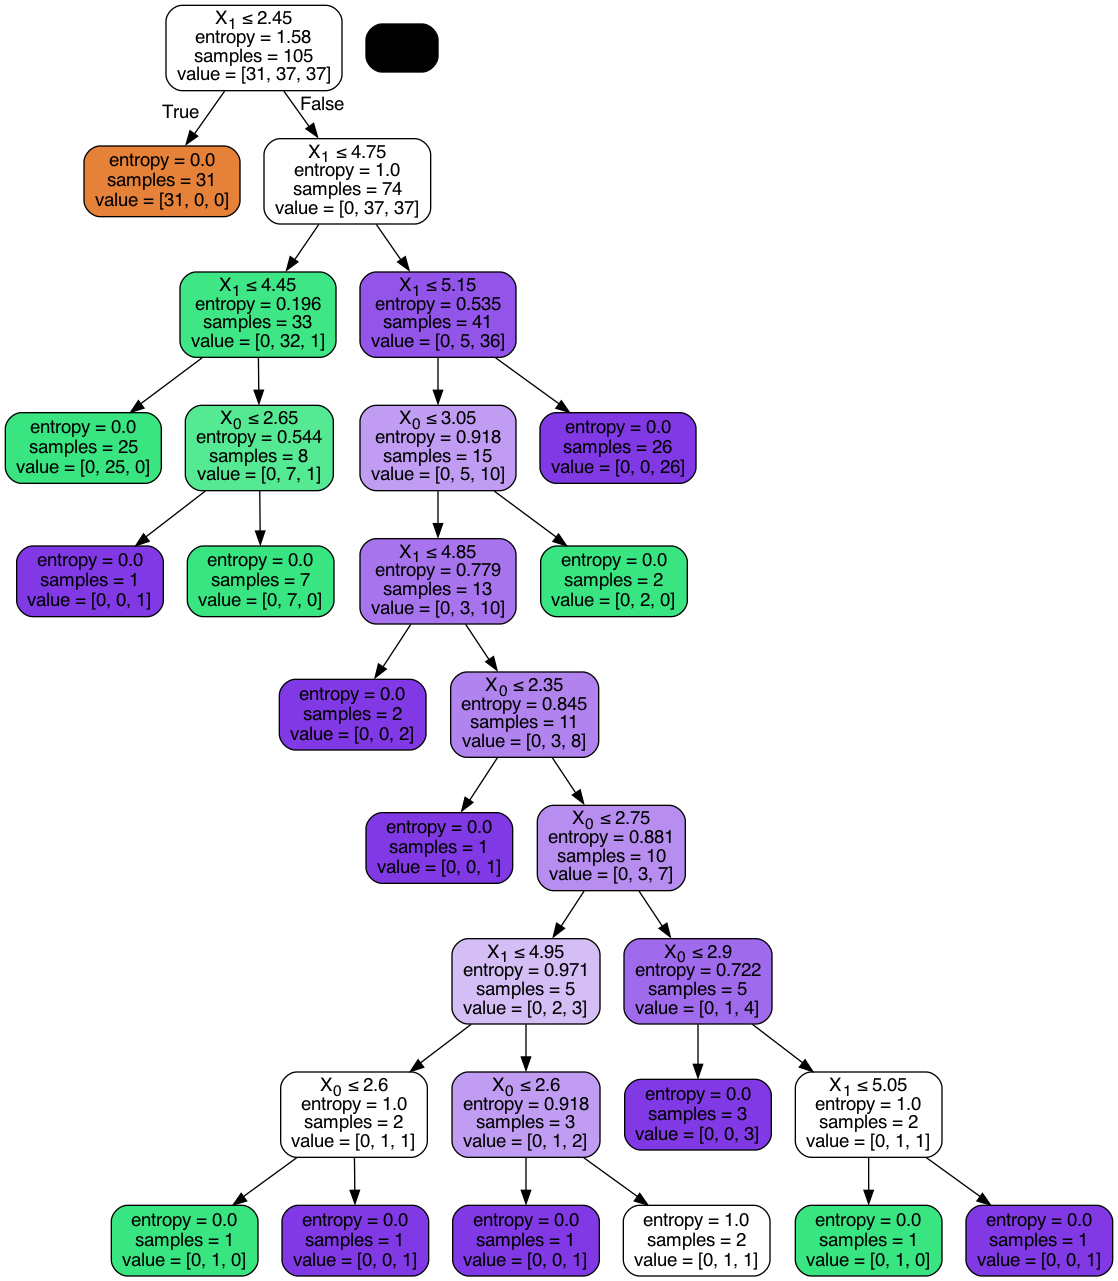

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

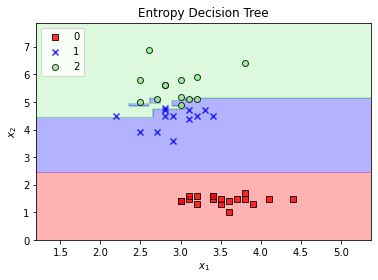

In [68]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Create a decision tree classifier using entropy as the criterion
entropy_tree = tree.DecisionTreeClassifier(criterion='entropy')

# Fit the decision tree classifier on the training data
entropy_tree = entropy_tree.fit(X_train, y_train)

# Export the decision tree as DOT format
dot_data = export_graphviz(entropy_tree, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree using Image function
display(Image(graph.create_png()))

# Plot the decision regions for the test data
plot_decision_regions(X=X_test, y=y_test, classifier=entropy_tree)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.title('Entropy Decision Tree')
plt.show()

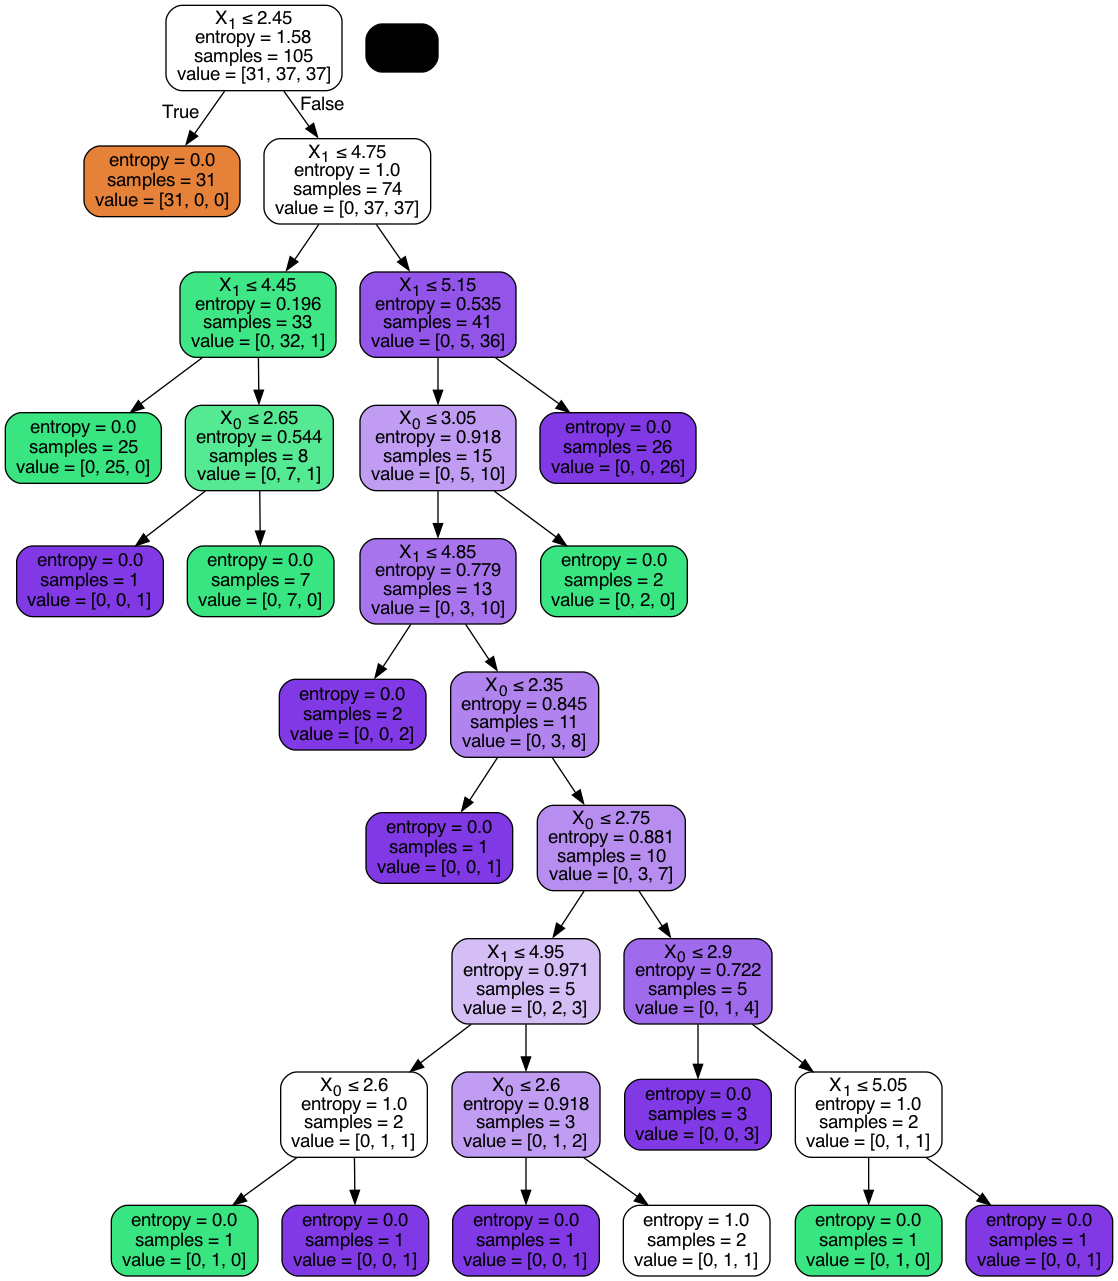

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

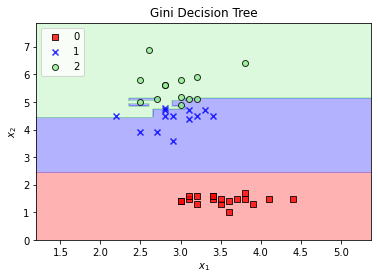

In [69]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Create a decision tree classifier using the Gini index as the criterion
gini_tree = tree.DecisionTreeClassifier(criterion='gini')

# Fit the decision tree classifier on the training data
gini_tree = gini_tree.fit(X_train, y_train)

# Export the decision tree as DOT format
dot_data = export_graphviz(gini_tree, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree using Image function
display(Image(graph.create_png()))

# Plot the decision regions for the test data
plot_decision_regions(X=X_test, y=y_test, classifier=gini_tree)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.title('Gini Decision Tree')
plt.show()

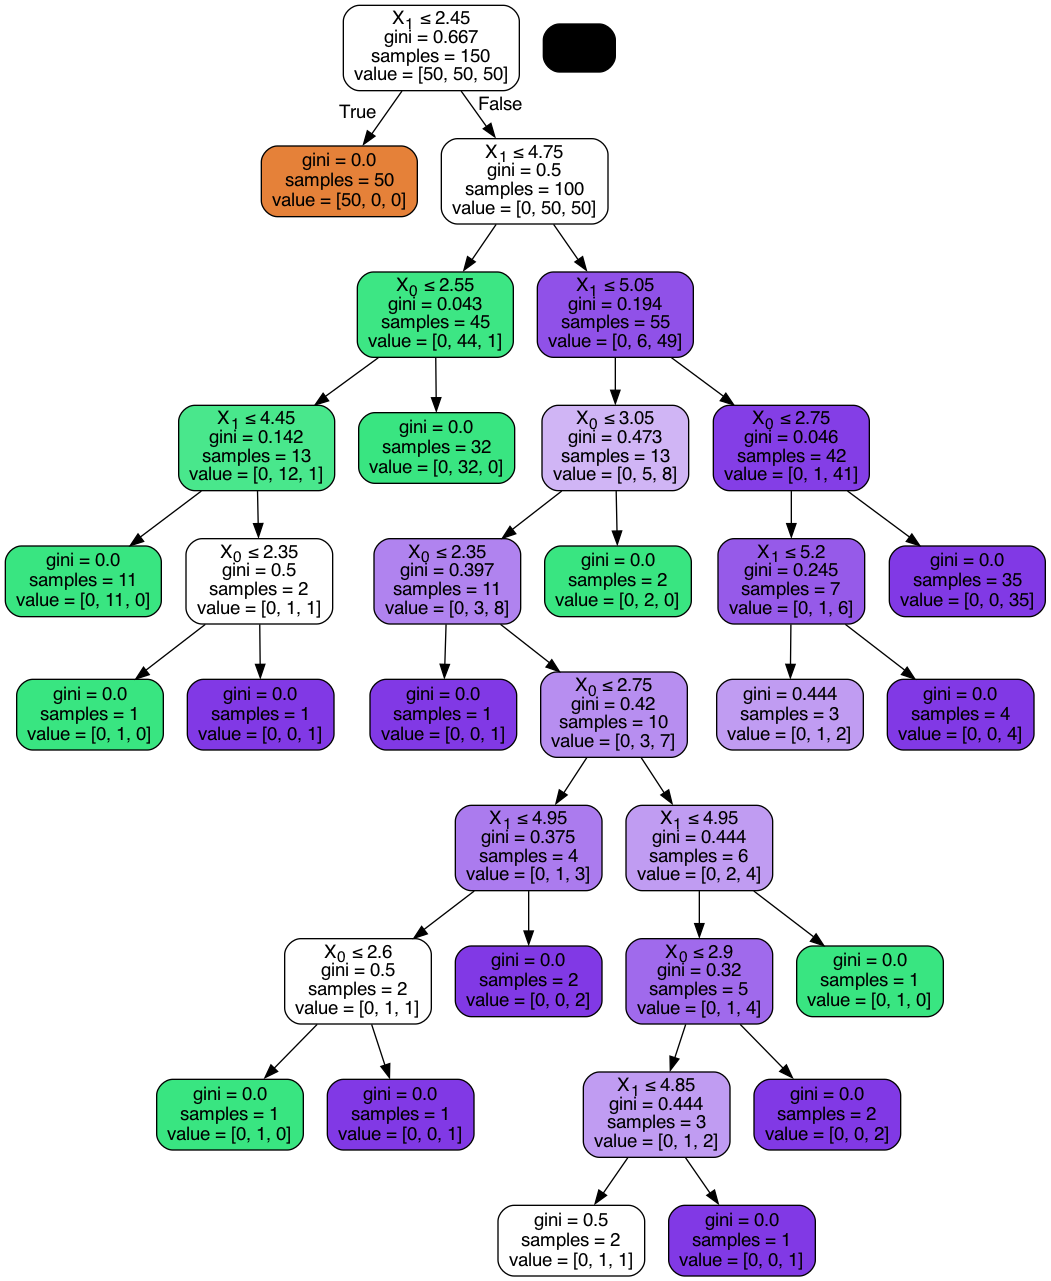

In [70]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Export the decision tree classifier (clf) as DOT format
dot_data = export_graphviz(clf, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the decision tree using Image function
Image(graph.create_png())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

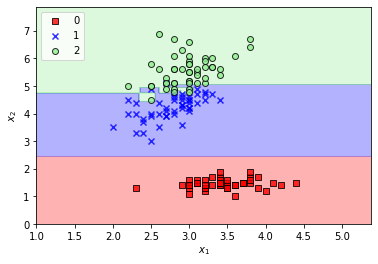

In [71]:
# Plot the decision regions for the classifier clf
plot_decision_regions(X=X, y=y, classifier=clf)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.show()

Gini impurity sprawdza z jaką frekwencją jakiś randomowy element z datasetu będzie źle oznakowany.
Min value gini index jest 0, a to się zdarza, gdy node jest czysty, czyli wszystkie elementy w nodzie są z tej samej klasy. Optymalny podział jest wybierany na podstawie kombinacji tresholdu i cech które mają najniższy możliwy gini index dla child nodes.
Entropia jest miarą nieuporządkowania cech w odniesieniu do klasy. Optymalny podział jest wybierany na podstawie cechy z najmniejszą entropią
Entropia jest bardziej złożona obliczeniowo ponieważ używa logarytmów, ale za to ma trochę lepsze wyniki.
Natomiast gini index jest szybszy w obliczeniach.


## 3. Check the performance of the decision tree for different tree depths - compare the results and provide reasoning.
Sprawdź działanie drzewa dla różnych głębokości drzewa - porównaj wyniki i uargumentuj rezultaty,

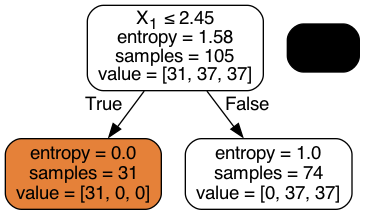

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

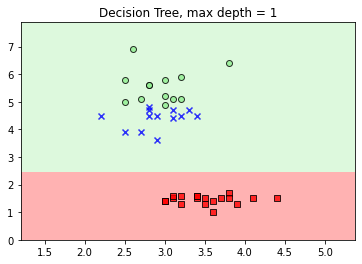

In [72]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)  # Create a decision tree classifier with entropy criterion and maximum depth of 1
decision_tree = decision_tree.fit(X_train, y_train)  # Fit the decision tree on the training data

dat = export_graphviz(decision_tree, out_file=None,
                      filled=True, rounded=True,
                      special_characters=True)  # Export the decision tree graph in DOT format

graph = pydotplus.graph_from_dot_data(dat)  # Create a graph from the DOT data
# graph.write_png('gini_decision_tree.png')

display(Image(graph.create_png()))  # Display the decision tree graph

plot_decision_regions(X=X_test, y=y_test, classifier=decision_tree)  # Plot the decision regions for the test data using the decision tree

# plt.xlabel(r'$x_1$')
# plt.ylabel(r'$x_2$')
# plt.legend(loc='upper left')

plt.title('Decision Tree, max depth = 1')
plt.show()

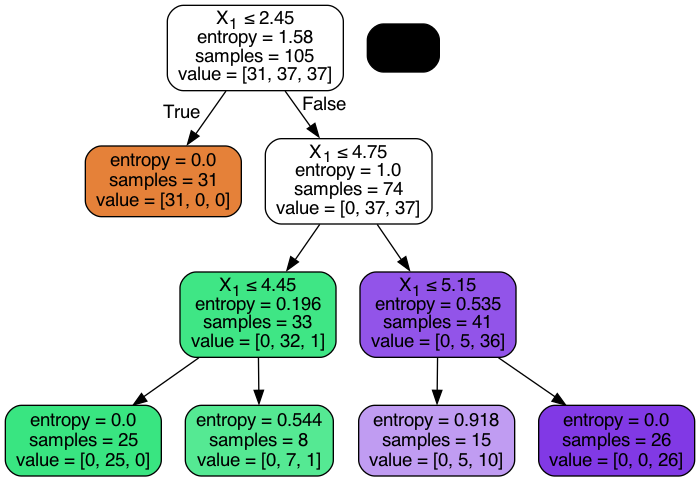

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

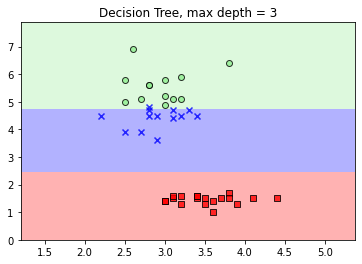

In [73]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)  # Create a decision tree classifier with entropy criterion and maximum depth of 3
decision_tree = decision_tree.fit(X_train, y_train)  # Fit the decision tree on the training data

dat = export_graphviz(decision_tree, out_file=None,
                      filled=True, rounded=True,
                      special_characters=True)  # Export the decision tree graph in DOT format

graph = pydotplus.graph_from_dot_data(dat)  # Create a graph from the DOT data
# graph.write_png('gini_decision_tree.png')

display(Image(graph.create_png()))  # Display the decision tree graph

plot_decision_regions(X=X_test, y=y_test, classifier=decision_tree)  # Plot the decision regions for the test data using the decision tree

# plt.xlabel(r'$x_1$')
# plt.ylabel(r'$x_2$')
# plt.legend(loc='upper left')
plt.title('Decision Tree, max depth = 3')
plt.show()

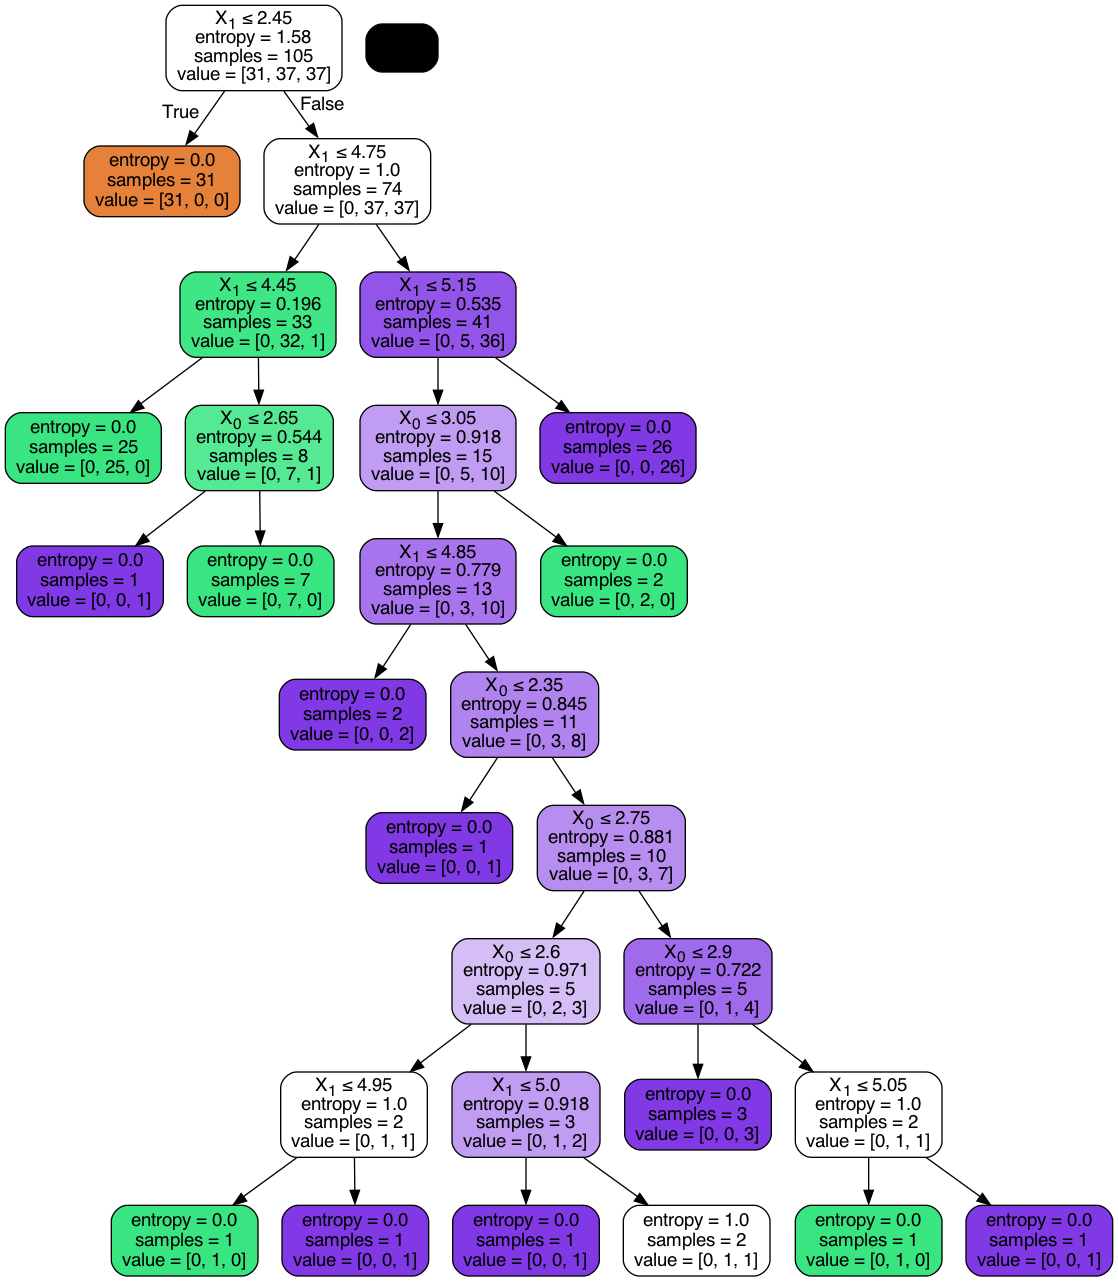

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

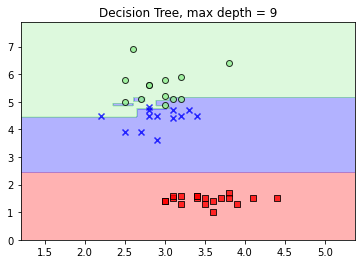

In [74]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)  # Create a decision tree classifier with entropy criterion and maximum depth of 9
decision_tree = decision_tree.fit(X_train, y_train)  # Fit the decision tree on the training data

dat = export_graphviz(decision_tree, out_file=None,
                      filled=True, rounded=True,
                      special_characters=True)  # Export the decision tree graph in DOT format

graph = pydotplus.graph_from_dot_data(dat)  # Create a graph from the DOT data
# graph.write_png('gini_decision_tree.png')

display(Image(graph.create_png()))  # Display the decision tree graph

plot_decision_regions(X=X_test, y=y_test, classifier=decision_tree)  # Plot the decision regions for the test data using the decision tree
# plt.xlabel(r'$x_1$')
# plt.ylabel(r'$x_2$')
# plt.legend(loc='upper left')
plt.title('Decision Tree, max depth = 9')
plt.show()

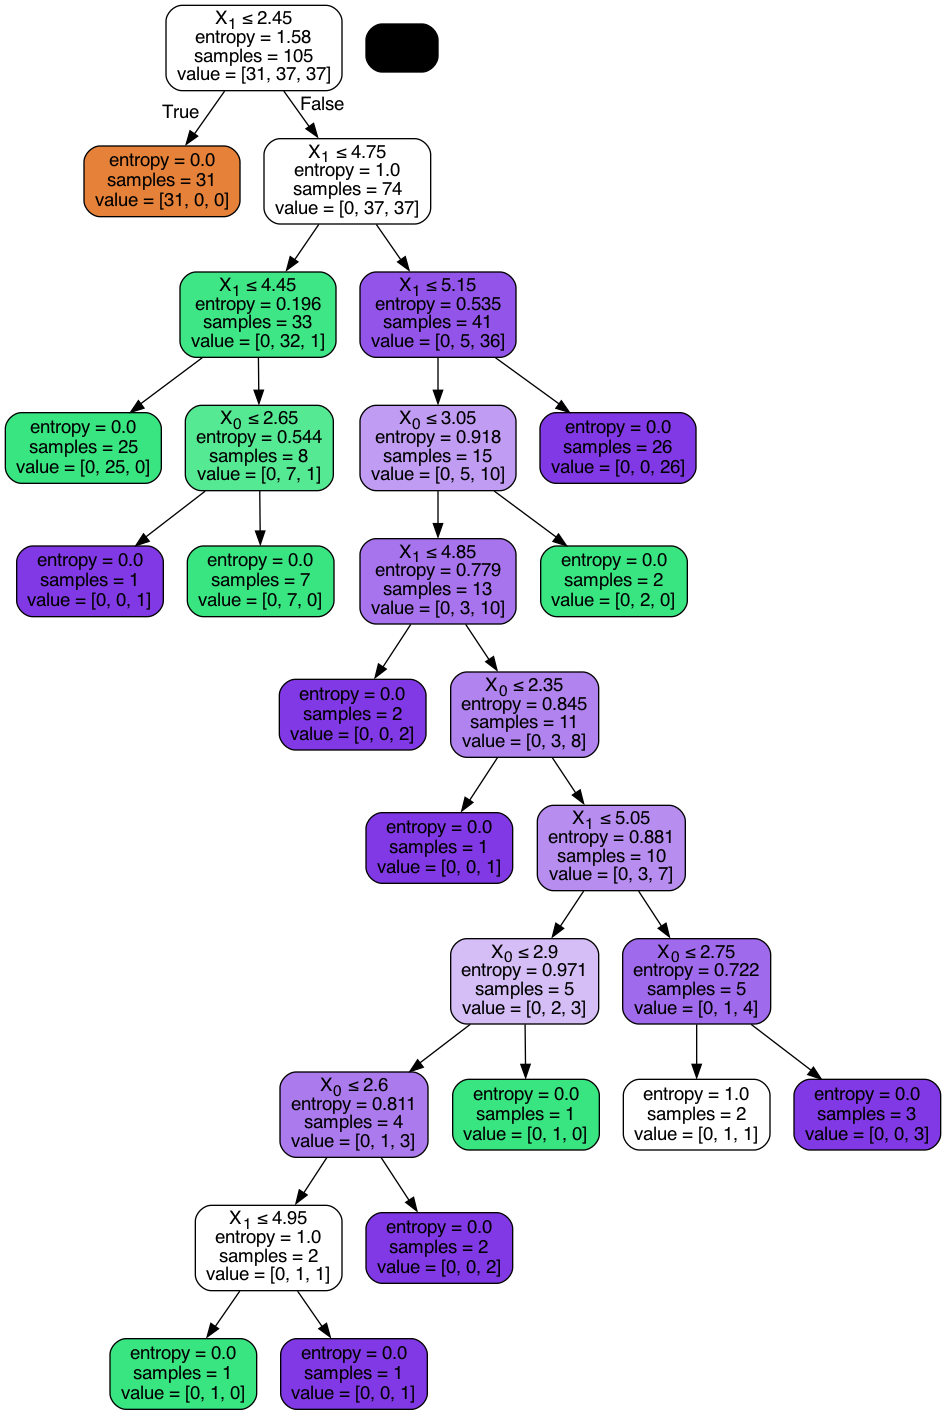

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

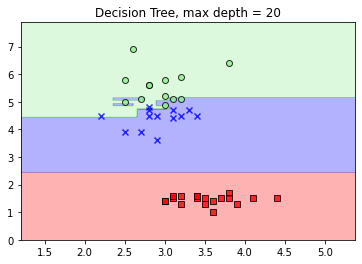

In [75]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=20)  # Create a decision tree classifier with entropy criterion and maximum depth of 20
decision_tree = decision_tree.fit(X_train, y_train)  # Fit the decision tree on the training data

dat = export_graphviz(decision_tree, out_file=None,
                      filled=True, rounded=True,
                      special_characters=True)  # Export the decision tree graph in DOT format

graph = pydotplus.graph_from_dot_data(dat)  # Create a graph from the DOT data
# graph.write_png('gini_decision_tree.png')

display(Image(graph.create_png()))  # Display the decision tree graph

plot_decision_regions(X=X_test, y=y_test, classifier=decision_tree)  # Plot the decision regions for the test data using the decision tree

# plt.xlabel(r'$x_1$')
# plt.ylabel(r'$x_2$')
# plt.legend(loc='upper left')
plt.title('Decision Tree, max depth = 20')
plt.show()

Głębokość drzewa decyzyjnego ma wpływ na skuteczność predykcji modelu.
Zbyt płytkie drzewo może nie wychwycić wystarczająco dużo zależności między cechami a klasą, co prowadzi do niskiej skuteczności modelu. np. decision tree z max depth = 1 ma tylko jeden węzeł decyzyjny i jedno poddrzewo dla każdej klasy. Wynikają z tego granice decyzyjne, które są dosyć proste i nie radzą sobie z klasyfikacją.
Natomiast zbyt głębokie drzewo może dopasować się zbyt dobrze do danych treningowych, co prowadzi do overfittingu.
W przypadku max depth = 3 drzewo rozróżnia trzy klasy i to będzie najszybsze ustawienie, ale mniej dokładne.
Drzewa z max depth = 9 i 20 są takie same, ponieważ na 9 poziomie drzewo jest do konca rozwinięte.


## 4. Check the performance of random forests for different numbers of decision trees - compare the results and provide justification for the outcomes.
Sprawdź działanie lasów losowych dla różnej liczby drzew decyzyjnych - porównaj wyniki i uargumentuj rezultaty.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

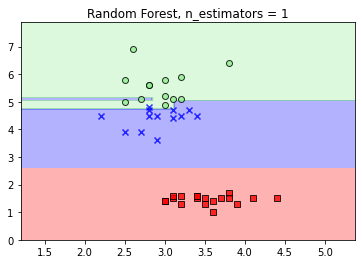

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

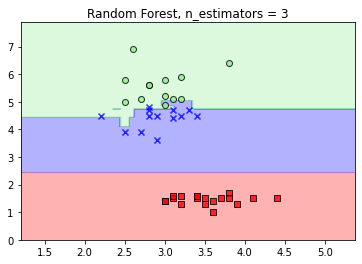

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

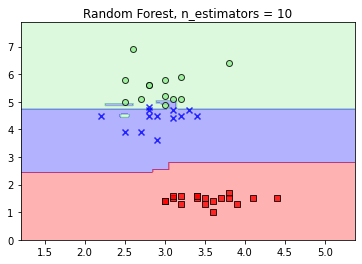

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/var/folders/96/jhkcnt71777c05tl9c9k2ssc0000gn/T/ipykernel_60093/2382359667.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx

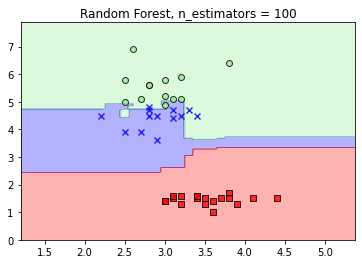

In [77]:
from sklearn import ensemble

random_forest = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=1)
random_forest = random_forest.fit(X_train, y_train)
plot_decision_regions(X=X_test, y=y_test, classifier=random_forest)
plt.title('Random Forest, n_estimators = 1')
plt.show()

random_forest = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=3)
random_forest = random_forest.fit(X_train, y_train)
plot_decision_regions(X=X_test, y=y_test, classifier=random_forest)
plt.title('Random Forest, n_estimators = 3')
plt.show()

random_forest = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=10)
random_forest = random_forest.fit(X_train, y_train)
plot_decision_regions(X=X_test, y=y_test, classifier=random_forest)
plt.title('Random Forest, n_estimators = 10')
plt.show()

random_forest = ensemble.RandomForestClassifier(criterion='entropy', n_estimators=100)
random_forest = random_forest.fit(X_train, y_train)
plot_decision_regions(X=X_test, y=y_test, classifier=random_forest)
plt.title('Random Forest, n_estimators = 100')
plt.show()

Zwiększenie liczb drzew decyzyjnych prowadzi do poprawy jakości klasyfikacji, ale tylko do pewnego momentu. Wprowadzenie zbyt dużej ilości drzew może doprowadzić do overfittingu. Np. jest widać poprawę wraz ze zwiększeniem liczby drzew decyzyjnych od 1 do 10, ale z 10 do 100 nie przynosi dużej zmiany w klasyfikacji.
Zbyt skomplikowany model traci zdolność do generalizacji nowych danych.